In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os

In [35]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/40531/13_6', sep='\t', 
                   header=None, names=['data_type', 'year_month', 'friday_6', 'friday_13','shop_name'])

In [36]:
df.head()

,data_type,year_month,friday_6,friday_13,shop_name
0,shopping,"1990, July",4942,4882,Epsom
1,shopping,"1991, September",4895,4736,Epsom
2,shopping,"1991, December",4805,4784,Epsom
3,shopping,"1992, March",4570,4603,Epsom
4,shopping,"1992, November",4506,4629,Epsom


## 1.5.2

Мы наблюдаем двумерную выборку

## 1.5.3

In [37]:
df.shape[0]

45

## 1.5.4

- выборочное среднее
- выборочная медиана
- выборочная дисперсия

In [38]:
mean = df['friday_13'].mean()
median = df['friday_13'].median()
variance= df['friday_13'].var(ddof=0)
answer = np.array([mean,median,variance])

In [39]:
print(', '.join(['{:0.1f}']*3).format(mean, variance, median))

5017.0, 1345096.1, 4736.0


In [40]:
with open('data\\answer_1.5.4.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  # -2 on Windows?
    np.savetxt(f, answer,  fmt = '%0.1f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.5.5 

Выборка разницы числа людей, приходящих в магазин 13-ого и 6-го числа каждого месяца

- выборочное среднее
- выборочный коэффициент эксцесса
$$ \gamma_1 = \frac{E(\xi - E\xi)^3}{\sigma^3}$$
- выборочный коэффициент ассиматерии
$$ \gamma_2 = \frac{E(\xi - E\xi)^4}{\sigma^4} - 3$$

In [74]:
from scipy.stats import kurtosis, skew

data = df['friday_13'] - df['friday_6']

mean = data.mean()
kurt = kurtosis(data)
skew = skew(data)

answer_2 = np.array([mean,kurt,skew])
answer_2

array([46.48888889,  4.96387147,  1.47236056])

In [75]:
with open('data\\answer_1.5.5.txt','w') as f:
    NEWLINE_SIZE_IN_BYTES = 2  
    np.savetxt(f, answer_2,  fmt = '%0.2f', newline=', ', delimiter=',')
    f.seek(0, os.SEEK_END)
    f.seek(f.tell() - NEWLINE_SIZE_IN_BYTES, os.SEEK_SET)
    f.truncate()

## 1.5.6

In [96]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

In [97]:
font_options = {'family' : 'monospace'}
figure_options = {'figsize':[17,10]}
plt.rc('font', **font_options)
plt.rc('figure', **figure_options)

In [98]:
df['diff'] = df['friday_13'] - df['friday_6']

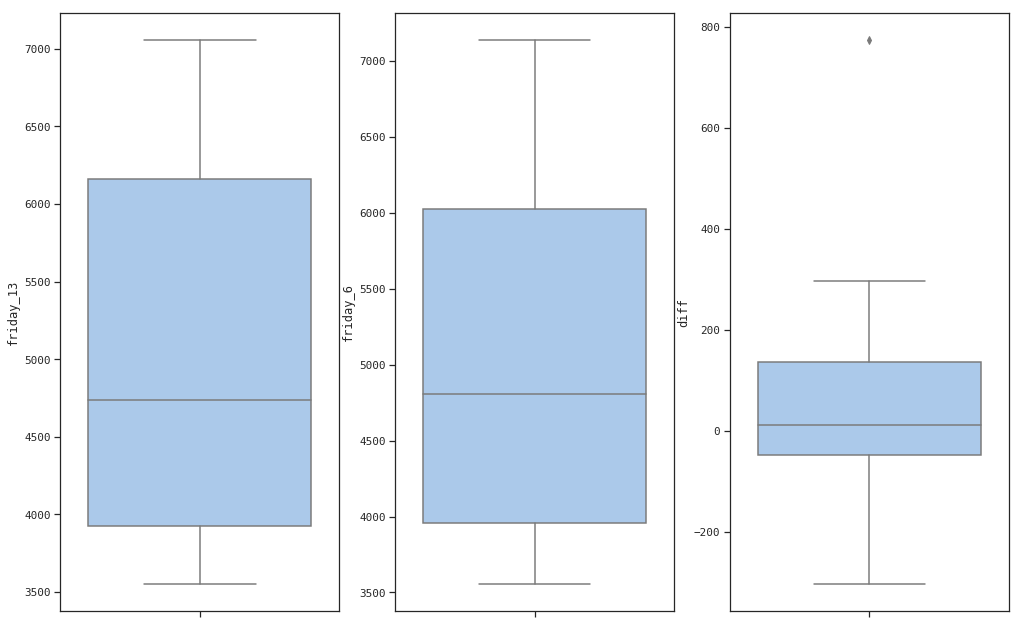

In [120]:
plt.figure(figsize=(17,11))
for i, j in enumerate(['friday_13','friday_6','diff']):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[j], orient='v')

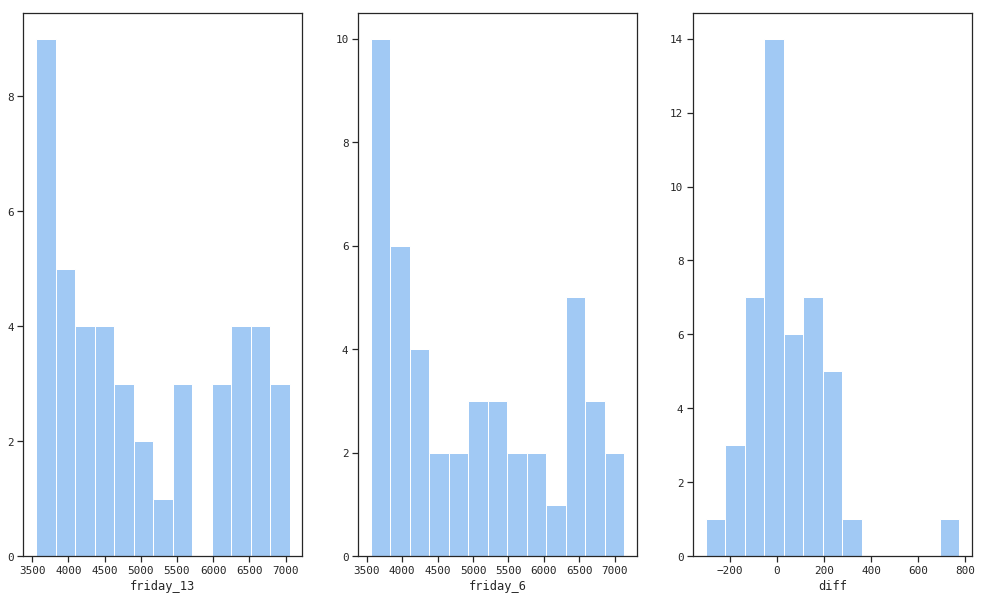

In [119]:
np.random.seed(42)

bins = int(1+3.2 * np.log(df.shape[0]))

for i, j in enumerate(['friday_13','friday_6','diff']):
    plt.subplot(1,3,i+1)
    plt.hist(df[j],bins= bins)
    plt.xlabel(j)

### Ответы
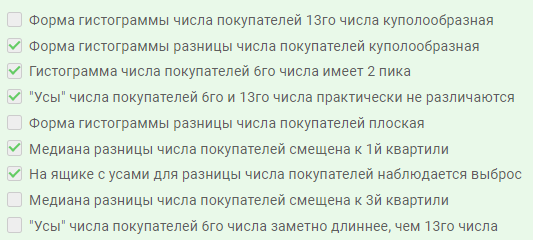

## 1.5.8

Если 2 выборки формируются с помощью случайного выбора из некоторой генеральной совокупности, то такие выборки являются независимыми (несвязанными). В выборе заложено условие "тип школы". Ответ:  **несвязные выборки**

In [173]:
colleges= pd.read_csv('data/colleges.txt',sep = '\t')

In [174]:
colleges.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


## 1.5.9

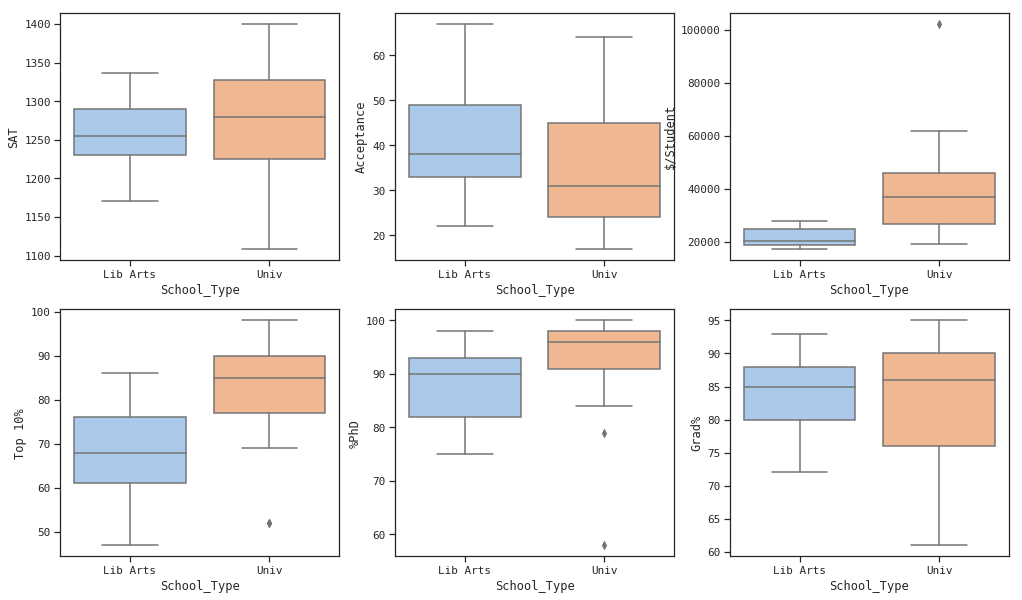

In [175]:
for i, j in enumerate(['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='School_Type', y=j, orient='v', data=colleges)

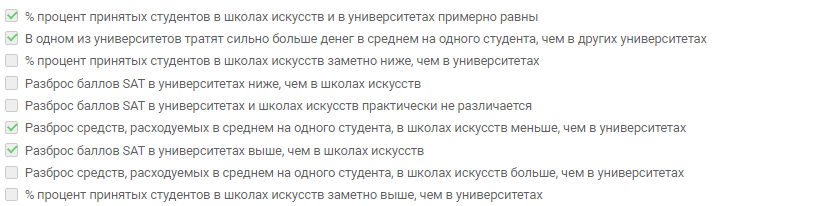

## 1.5.11

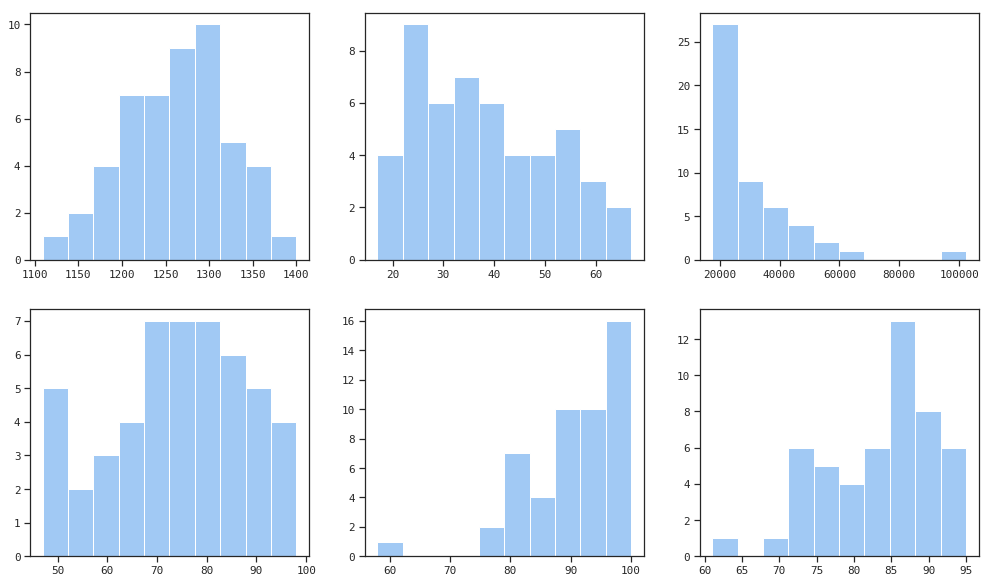

In [176]:
for i, j in enumerate(['SAT', 'Acceptance', '$/Student', 'Top 10%', '%PhD', 'Grad%']):
    plt.subplot(2,3,i+1)
    plt.hist(colleges[j])

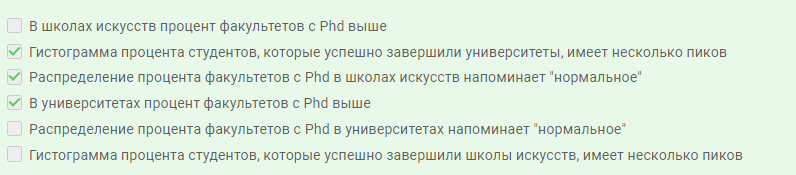

## 1.5.12

- выборочное среднее SAT школ искусств
- 3й выборочный квартиль Acceptance университетов
- название института(колледжа), в котором тратят денег в среднем на одного студента больше, чем в других институтах(колледжах)

Формат файла
- School -  название школы
- School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')
- SAT - медиана объединенных значений Math и Verbal SAT  студентов
- Acceptance: - % принятых абитуриентов
- `$/Student`  -  Деньги, расходуемые на одного студента в среднем
- Top `10%` -  % студентов в топ 10% выпускных классов
- `%PhD` -  %  факультетов, имеющих PhD
- `Grad%`: % студентов, которые успешно завершили обучение

In [177]:
mean = colleges.query('School_Type =="Lib Arts"')['SAT'].mean()

In [180]:
colleges.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [179]:
uni = colleges[colleges['School_Type']=='Univ']
art = colleges[colleges['School_Type']=='Lib Arts']

print(art['SAT'].mean())
print(uni['Acceptance'].quantile(0.75))
print(uni[uni['$/Student']==uni['$/Student'].max()]['School'])

1256.64
45.0
29    Cal Tech
Name: School, dtype: object
